### Libraries for dataset manipulation and visulization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Dataset Loading

In [2]:
dataset = pd.read_csv('C:\\Users\\Mahmood Yousaf\\Desktop\\FYP\\Final-Year-Project-Soil-Analysis-using-machine-learning\\Extracted Features\\pH_Index_with_EC_value.csv')

### Preprocessing on dataset

In [3]:
X = np.array(dataset['pH_Index'])
Y = np.array(dataset['EC_Value'])
print(X)
print(Y)

[0.00703939 0.0073076  0.00680586 ... 0.00868003 0.0176074  0.01053636]
[0.54 0.54 0.55 ... 1.1  0.45 0.45]


In [4]:
X = X.reshape(len(X),1)
Y = Y.reshape(len(Y),1)
print(X,Y)

[[0.00703939]
 [0.0073076 ]
 [0.00680586]
 ...
 [0.00868003]
 [0.0176074 ]
 [0.01053636]] [[0.54]
 [0.54]
 [0.55]
 ...
 [1.1 ]
 [0.45]
 [0.45]]


### DTR model training

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, Y)

In [6]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

### Prediction 

In [7]:
prediction = regressor.predict([[500]])
print(prediction)

[1.17]


In [8]:
pred = regressor.predict(X_val)
print(pred)

[ 0.51   0.2    1.2    1.95   1.14   0.85   1.05   0.98   1.19   0.16
  0.24   0.94   1.15   1.98   0.75   1.2    0.76   0.98   0.09   0.81
  1.21   0.85   1.15   0.98   0.25   1.02   1.2    2.4    0.26   1.55
  1.25   0.2    0.97   0.64   1.3    0.25   0.23   1.13   1.14   1.19
  1.76   2.2    1.12   7.42   1.14   0.85   0.4    1.     1.74   1.2
  1.35   0.76   0.82   0.96   1.01   3.275  1.36   0.24   0.44   1.08
  1.08   0.565  0.19   0.23   0.525  0.77   1.95   0.88   0.44   0.58
  0.97   0.22   0.25   1.5    0.26   0.91   1.53   0.26   0.525  0.93
  0.42   1.17   0.58   1.65   0.41   9.3    1.14   0.26   0.55   0.22
  0.75   9.3    1.55   0.98   1.01   1.53   1.02   1.1    0.65   0.11
  0.94   1.93   0.98   1.11   0.12   0.96   0.75   0.93   1.09   0.24
  1.14   1.09   2.3    2.3    1.01   1.23   1.53   1.98   1.5    0.94
  0.81   1.1    2.2    0.88   1.2    0.9    1.12   0.88   0.58   1.19
  3.39   1.93   0.22   0.98   0.16   0.17   1.2    0.506  0.83   0.81
  0.58  15.6    0.31 

### Visulization

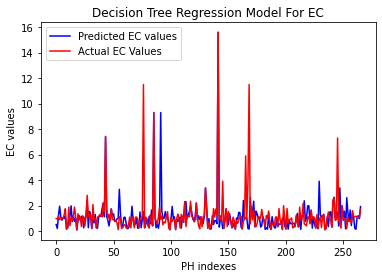

In [9]:
plt.plot(pred,color = 'Blue')
plt.plot(y_val, color = 'red')
plt.title("Decision Tree Regression Model For EC")
plt.legend(['Predicted EC values', 'Actual EC Values'], loc='upper left')
plt.xlabel('PH indexes')
plt.ylabel('EC values')
plt.savefig("DTRmodelForECestimationUsingpHIndexes.jpg")